In [19]:
import csv
import urllib.request
import re
import time
from bs4 import BeautifulSoup


url = ""
place_name = ""
def getUrlAndPlaceName():#获取用户输入值并做爬虫准备
    print("欢迎来到天气可视化查询！")    
    place = input("请输入您想查询的城市：（1）北京（2）上海（3）南京（4）广州（5）深圳")
    if place == "1":
        url = "http://www.weather.com.cn/weather/101010100.shtml"
        place_name = "北京"
    if place == "2":
        url = "http://www.weather.com.cn/weather/101020100.shtml"
        place_name = "上海"
    if place == "3":
        url = "http://www.weather.com.cn/weather/101190101.shtml"
        place_name = "南京"
    if place == "4":
        url = "http://www.weather.com.cn/weather/101280101.shtml"
        place_name = "广州"
    if place == "5":
        url = "http://www.weather.com.cn/weather/101280601.shtml"
        place_name = "深圳"
    header = ("User-Agent","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36")  # 设置头部信息
    opener = urllib.request.build_opener()  # 修改头部信息
    opener.addheaders = [header]         #修改头部信息
    request = urllib.request.Request(url)   # 制作请求
    response = urllib.request.urlopen(request)   #  得到请求的应答包
    html = response.read()   #将应答包里面的内容读取出来
    html = html.decode('utf-8')    # 使用utf-8进行编码，不重新编码就会成乱码
    dealDataAndSave(html,place_name)

def dealDataAndSave(html,place):#爬虫和数据存储
    print(place_name)
    final = []   #初始化一个空的list，我们为将最终的的数据保存到list
    bs = BeautifulSoup(html,"html.parser")   # 创建BeautifulSoup对象
    body = bs.body  # 获取body部分
    data = body.find('div',{'id':'7d'})  # 找到id为7d的div
    ul = data.find('ul')  # 获取ul部分
    li = ul.find_all('li')  # 获取所有的li
    # print (li)

    i = 0
    for day in li:  # 对每个li标签中的内容进行遍历
        if i < 7:
            temp = []
            date = day.find('h1').string # 找到日期
            d = re.findall("\d+",date)[0]
            datetime = 0
            if int(d)<25:
                datetime = time.strftime("2019/1") + "/" + d
            else:
                datetime = time.strftime("%Y/%m") + "/" + d
    #         print (date)
            temp.append(datetime)  # 添加到temp中
        #     print (temp)
            inf = day.find_all('p')  # 找到li中的所有p标签
    #     #     print(inf)
    #     #     print (inf[0])
    #         temp.append(inf[0].string)  # 第一个p标签中的内容（天气状况）加到temp中
            if inf[1].find('span') is None:
                temperature_highest = None # 天气预报可能没有当天的最高气温（到了傍晚，就是这样），需要加个判断语句,来输出最低气温
            else:
                temperature_highest = inf[1].find('span').string # 找到最高温度
                temperature_highest = temperature_highest.replace('℃', '') # 到了晚上网站会变，最高温度后面也有个℃
            temperature_lowest = inf[1].find('i').string  #找到最低温度
            temperature_lowest = temperature_lowest.replace('℃', '')  # # 最低温度后面有个℃，去掉这个符号
            temp.append(temperature_highest)
            temp.append(temperature_lowest)
            final.append(temp)
            i = i +1

    # print(final)

    with open('weather.csv', 'a', errors='ignore', newline='') as f:
                f_csv = csv.writer(f)
                f_csv.writerows(final)
    print(place + "未来七天天气已储存到weather.csv中")
getUrlAndPlaceName()

欢迎来到天气可视化查询！
请输入您想查询的城市：（1）北京（2）上海（3）南京（4）广州（5）深圳5

深圳未来七天天气已储存到weather.csv中


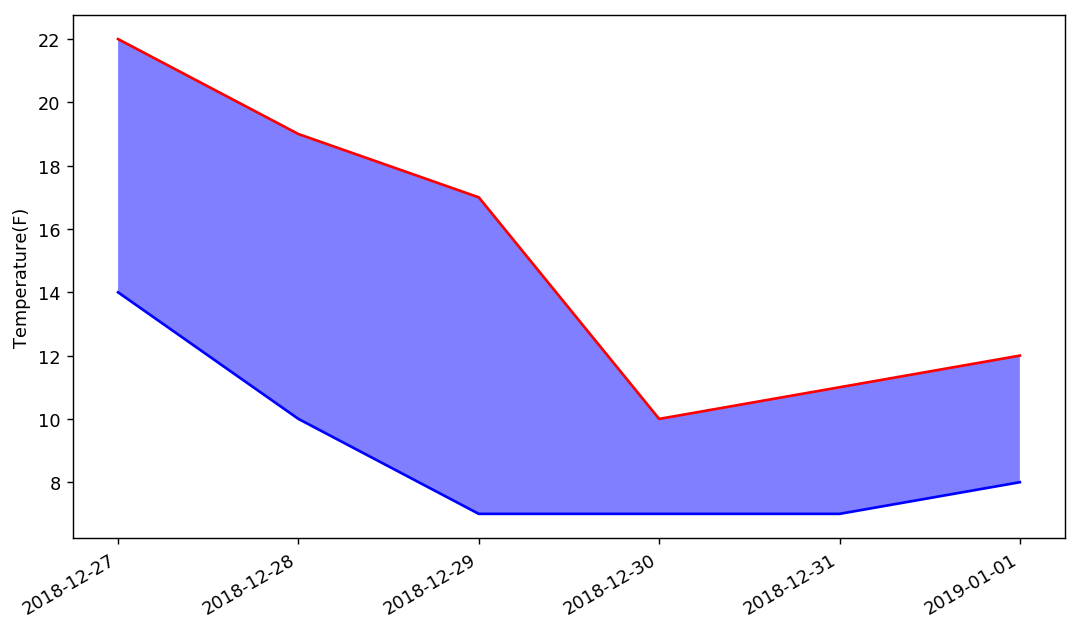

In [20]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
#要读取的文件
filename = 'weather.csv'

def readAndWrite():
    #打开文件并将文件结果对象存储到f中
    with open(filename) as f:
        #创建一个与该文件相关联的阅读器(reader)对象，reader处理文件中以逗号分隔每一行的数据
        reader = csv.reader(f)
        #模块csv包含函数next()，将阅读器对象传递给它将返回文件的下一行
        headr_row = next(reader)

        dates,highs,lows = [],[],[]
        for row in reader:
            #datetime.strptime()设置时间日期
            current_date = datetime.strptime(row[0],"%Y/%m/%d")
            dates.append(current_date)

            high = int(row[1])
            highs.append(high)

            low = int(row[2])
            lows.append(low)

        # 数据可视化
        fig = plt.figure(dpi=128,figsize=(10,6))
        #红色显示最高气温，蓝色显示最低气温
        plt.plot(dates,highs,c='red')
        plt.plot(dates,lows,c = 'blue')
        #向fill_between()函数传递一个x值：dates 两个y值：highs,lows 中间填充色:blue 透明度:0.5
        plt.fill_between(dates,highs,lows,facecolor = 'blue',alpha=0.5)

        #设置图形的格式
    #     plt.title("Nanjing weather conditions in the next seven days",fontsize=10)
        plt.xlabel('',fontsize=5)
        #来绘制斜的日期标签
        fig.autofmt_xdate()
        plt.ylabel("Temperature(F)",fontsize = 10)
        plt.tick_params(axis='both',which='major',labelsize = 10)
        plt.show()
readAndWrite()